# Sistemas de ecuaciones lineales
## Modelo térmico nodal de un satélite

## Descripción del problema

Se desea analizar el equilibrio térmico de un satélite mediante un modelo simplificado de cuatro nodos térmicos.  
Cada nodo representa una zona o componente del satélite:
- **Nodo 1**: Panel solar
- **Nodo 2**: Estructura principal  
- **Nodo 3**: Sistema de baterías
- **Nodo 4**: Instrumentos científicos

Los nodos intercambian calor entre sí mediante conductancias térmicas $g_{ij}$ (en W/K), y cada nodo también puede intercambiar calor con el espacio exterior a través de una conductancia efectiva $g_{is}$.



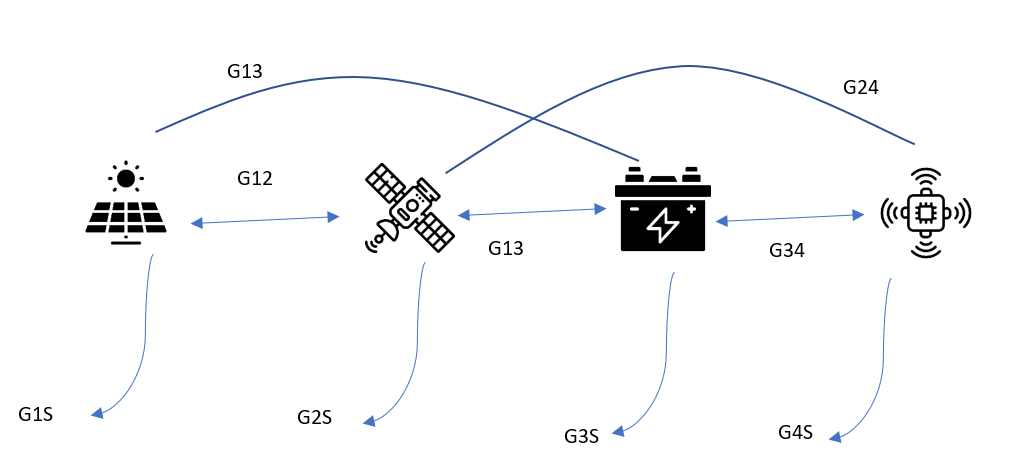


Además, cada nodo puede generar o recibir calor interno $q_i$ (en W).

Conexiones internas entre nodos:
- **Nodo 1 → Nodo 2** (conductancia $g_{12}$)
- **Nodo 1 → Nodo 3** (conductancia $g_{13}$)  
- **Nodo 2 → Nodo 4** (conductancia $g_{24}$)
- **Nodo 3 → Nodo 4** (conductancia $g_{34}$)

Conexiones con espacio exterior:
- **Cada nodo ↔ Espacio exterior** (conductancias $g_{1s}$, $g_{2s}$, $g_{3s}$, $g_{4s}$)

#### Para cualquier nodo i en estado estacionario:

$$
q_i + \sum_{j \neq i} g_{ij}(T_j - T_i) = g_{is}(T_i - T_{\text{espacio}})
$$


Lado izquierdo (Calor que ENTRA al nodo):
- **$q_i$**: Calor generado internamente (W)
- **$\sum g_{ij}(T_j - T_i)$**: Transferencia neta por conducción desde otros nodos

Lado derecho (Calor que SALE del nodo):
- **$g_{is}(T_i - T_{\text{espacio}})$**: Transferencia por radiación al espacio exterior

Donde cada $T_i$ representa la temperatura del nodo $i$ en el estado estacionario (en K).

## Objetivo

Resolver el sistema para determinar las **temperaturas nodales** $T_1, T_2, T_3, T_4$ que satisfacen el equilibrio térmico del satélite.

---

Se sabe que las conductancias son las siguientes:

### Conductancias Térmicas (W/K):
- $g_{12} = 2.5$ (Panel solar ↔ Estructura)
- $g_{13} = 1.8$ (Panel solar ↔ Baterías)
- $g_{24} = 3.2$ (Estructura ↔ Instrumentos)
- $g_{34} = 2.1$ (Baterías ↔ Instrumentos)
- $g_{1s} = 1.2$ (Panel solar → Espacio)
- $g_{2s} = 0.8$ (Estructura → Espacio)
- $g_{3s} = 0.2$ (Baterías → Espacio)
- $g_{4s} = 0.1$ (Instrumentos → Espacio)

Y que las fuentes producen el siguiente calor:

### Fuentes de Calor Interno (W):
- $q_1 = 150$ (Panel solar)
- $q_2 = 80$ (Estructura)
- $q_3 = 120$ (Baterías)
- $q_4 = 200$ (Instrumentos)

---

## Sistema de ecuaciones lineales

Aplicando la ecuación general a cada nodo:

**Nodo 1 (Panel Solar):**
$$
(1.2 + 2.5 + 1.8)T_1 - 2.5T_2 - 1.8T_3 = 150 + 1.2 \times 3
$$

**Nodo 2 (Estructura):**
$$
(0.8 + 2.5 + 3.2)T_2 - 2.5T_1 - 3.2T_4 = 80 + 0.8 \times 3
$$

**Nodo 3 (Baterías):**
$$
(0.2 + 1.8 + 2.1)T_3 - 1.8T_1 - 2.1T_4 = 120 + 0.2 \times 3
$$

**Nodo 4 (Instrumentos):**
$$
(0.1 + 3.2 + 2.1)T_4 - 3.2T_2 - 2.1T_3 = 200 + 0.1 \times 3
$$

**Sistema numérico final:**
$$
\begin{aligned}
5.5T_1 - 2.5T_2 - 1.8T_3 &= 153.6 \\
-2.5T_1 + 6.5T_2 - 3.2T_4 &= 82.4 \\
-1.8T_1 + 4.1T_3 - 2.1T_4 &= 120.6 \\
-3.2T_2 - 2.1T_3 + 5.4T_4 &= 200.3
\end{aligned}
$$

Estas ecuaciones forman un sistema lineal:

$$
A \cdot T = b
$$

donde

$$
A = \begin{bmatrix}
5.5 & -2.5 & -1.8 & 0 \\
-2.5 & 6.5 & 0 & -3.2 \\
-1.8 & 0 & 4.1 & -2.1 \\
0 & -3.2 & -2.1 & 5.4
\end{bmatrix},
\quad
T = \begin{bmatrix}
T_1 \\ T_2 \\ T_3 \\ T_4
\end{bmatrix},
\quad
b = \begin{bmatrix}
153.6 \\ 82.4 \\ 120.6 \\ 200.3
\end{bmatrix}
$$
---

## Balance de energía global

### Principio de conservación:

$$
\sum_{i=1}^{4} q_i = \sum_{i=1}^{4} g_{is}(T_i - T_{\text{espacio}})
$$


- Calor total generado = Calor radiado
- Temperatura espacio exterior: $T_{\text{espacio}} = 3$ K

El sistema garantiza que este balance se cumple automáticamente cuando se resuelven las ecuaciones.



## 1. Jacobi

### Ecuaciones de Recurrencia de Jacobi

Las ecuaciones de recurrencia del método de Jacobi son:


Ecuaciones específicas:

**Para $T_1$:**
$$T_1^{(k+1)} = \frac{1}{5.5} \left( 153.6 + 2.5T_2^{(k)} + 1.8T_3^{(k)} \right)$$

**Para $T_2$:**
$$T_2^{(k+1)} = \frac{1}{6.5} \left( 82.4 + 2.5T_1^{(k)} + 3.2T_4^{(k)} \right)$$

**Para $T_3$:**
$$T_3^{(k+1)} = \frac{1}{4.1} \left( 120.6 + 1.8T_1^{(k)} + 2.1T_4^{(k)} \right)$$

**Para $T_4$:**
$$T_4^{(k+1)} = \frac{1}{5.4} \left( 200.3 + 3.2T_2^{(k)} + 2.1T_3^{(k)} \right)$$


#### Vector inicial:
$$
T^{(0)} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} \text{ K}
$$


### Criterio de convergencia

#### Error relativo aproximado:

Para cada variable $T_i$ en la iteración $k$:

$$
\varepsilon_{a,i}^{(k)} = \left| \frac{T_i^{(k)} - T_i^{(k-1)}}{T_i^{(k)}} \right| \times 100\%
$$

#### Error máximo:

$$
\varepsilon_{\text{max}}^{(k)} = \max\left( \varepsilon_{a,1}^{(k)}, \varepsilon_{a,2}^{(k)}, \varepsilon_{a,3}^{(k)}, \varepsilon_{a,4}^{(k)} \right)
$$

#### Condición de parada:

$$
\varepsilon_{\text{max}}^{(k)} < \varepsilon_s
$$

Donde $\varepsilon_s$ es la tolerancia especificada

Máximo iteraciones: 1000

In [12]:
import numpy as np
from IPython.display import display, Math, Latex

# Parámetros del sistema
g12, g13, g24, g34 = 2.5, 1.8, 3.2, 2.1

# Conductancias al espacio (W/K)
g1s = 1.2 
g2s = 0.8  
g3s = 0.2   
g4s = 0.1   

q1, q2, q3, q4 = 150, 80, 120, 200
T_espacio = 3  

# Términos correctos del lado derecho
b1 = q1 + g1s * T_espacio  
b2 = q2 + g2s * T_espacio  
b3 = q3 + g3s * T_espacio  
b4 = q4 + g4s * T_espacio  

# Coeficientes de las ecuaciones
a11 = g12 + g13 + g1s  
a22 = g12 + g24 + g2s  
a33 = g13 + g34 + g3s  
a44 = g24 + g34 + g4s  

def jacobi(max_iter=1000, tol=1e-16):

    # Vector semilla inicial (ceros)
    T = np.zeros(4)
    T_new = np.zeros(4)
    
    for k in range(max_iter):
        T_old = T.copy()
        
        # Ecuaciones de Jacobi
        T_new[0] = (b1 + g12*T_old[1] + g13*T_old[2]) / a11
        T_new[1] = (b2 + g12*T_old[0] + g24*T_old[3]) / a22
        T_new[2] = (b3 + g13*T_old[0] + g34*T_old[3]) / a33
        T_new[3] = (b4 + g24*T_old[1] + g34*T_old[2]) / a44
        
        T = T_new.copy()
        
        # Calcular error máximo
        max_error = np.max(np.abs(T - T_old))
        
        # Verificar convergencia
        if max_error < tol:
            return T, k+1, max_error
    
    return T, max_iter, max_error

# Resolver el sistema 
display(Latex(r"### Solución por Jacobi"))
T_sol, iteraciones, error_final = jacobi()

# Mostrar resultados
display(Latex(r"#### Resultados numéricos"))
display(Math(rf"""
\mathbf{{T}}_{{\text{{sol}}}} = \begin{{bmatrix}}
{T_sol[0]:.6f} \\
{T_sol[1]:.6f} \\
{T_sol[2]:.6f} \\
{T_sol[3]:.6f}
\end{{bmatrix}} \text{{ K}}
"""))

display(Latex(r"#### Temperaturas en grados Celsius"))
for i in range(4):
    temp_c = T_sol[i] - 273.15
    display(Latex(f"T{i+1} = {temp_c:.2f} °C"))

display(Math(rf"Iteraciones: {iteraciones}"))
display(Math(rf"Error final: {error_final:.2e}"))

# Balance energético detallado
display(Latex(r"### Balance Energético Verificado"))

calor_generado = q1 + q2 + q3 + q4
calor_radiado = (g1s*(T_sol[0]-T_espacio) + 
                 g2s*(T_sol[1]-T_espacio) + 
                 g3s*(T_sol[2]-T_espacio) + 
                 g4s*(T_sol[3]-T_espacio))

display(Math(rf"\sum q_i = {calor_generado} \text{{ W}}"))
display(Math(rf"\sum g_{{is}}(T_i - T_{{\text{{espacio}}}}) = {calor_radiado:.2f} \text{{ W}}"))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2. Gauss-Seidel

#### Ecuaciones de recurrencia


**Para $T_1^{(k+1)}$:**
$$
T_1^{(k+1)} = \frac{153.6 + 2.5T_2^{(k)} + 1.8T_3^{(k)}}{5.5}
$$

**Para $T_2^{(k+1)}$:**
$$
T_2^{(k+1)} = \frac{82.4 + 2.5T_1^{(k+1)} + 3.2T_4^{(k)}}{6.5}
$$

**Para $T_3^{(k+1)}$:**
$$
T_3^{(k+1)} = \frac{120.6 + 1.8T_1^{(k+1)} + 2.1T_4^{(k)}}{4.1}
$$

**Para $T_4^{(k+1)}$:**
$$
T_4^{(k+1)} = \frac{200.3 + 3.2T_2^{(k+1)} + 2.1T_3^{(k+1)}}{5.4}
$$


#### Vector inicial:

El vector inicial es el mismo que para Jacobi

$$
T^{(0)} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix} \text{ K}
$$


In [ ]:
# Parámetros del sistema
g12, g13, g24, g34 = 2.5, 1.8, 3.2, 2.1

# Conductancias al espacio (W/K)
g1s = 1.2 
g2s = 0.8  
g3s = 0.2   
g4s = 0.1   

q1, q2, q3, q4 = 150, 80, 120, 200
T_espacio = 3  

# Términos correctos del lado derecho
b1 = q1 + g1s * T_espacio  
b2 = q2 + g2s * T_espacio  
b3 = q3 + g3s * T_espacio  
b4 = q4 + g4s * T_espacio  

# Coeficientes de las ecuaciones 
a11 = g12 + g13 + g1s  
a22 = g12 + g24 + g2s  
a33 = g13 + g34 + g3s  
a44 = g24 + g34 + g4s  

def gauss_seidel(max_iter=1000, tol=1e-16):

    # Vector semilla inicial 
    T = np.zeros(4)
    
    for k in range(max_iter):
        T_old = T.copy()
        
        # Ecuaciones de Gauss-Seidel
        T[0] = (b1 + g12*T[1] + g13*T[2]) / a11
        T[1] = (b2 + g12*T[0] + g24*T[3]) / a22
        T[2] = (b3 + g13*T[0] + g34*T[3]) / a33
        T[3] = (b4 + g24*T[1] + g34*T[2]) / a44
        
        # Calcular error máximo
        max_error = np.max(np.abs(T - T_old))
        
        # Verificar convergencia
        if max_error < tol:
            return T, k+1, max_error
    
    return T, max_iter, max_error

# Resolver el sistema 
display(Latex(r"### Solución por Gauss-Seidel"))
T_sol, iteraciones, error_final = gauss_seidel()

# Mostrar resultados
display(Latex(r"#### Resultados numéricos"))
display(Math(rf"""
\mathbf{{T}}_{{\text{{sol}}}} = \begin{{bmatrix}}
{T_sol[0]:.6f} \\
{T_sol[1]:.6f} \\
{T_sol[2]:.6f} \\
{T_sol[3]:.6f}
\end{{bmatrix}} \text{{ K}}
"""))

display(Latex(r"#### Temperaturas en grados Celsius"))
for i in range(4):
    temp_c = T_sol[i] - 273.15
    display(Latex(f"T{i+1} = {temp_c:.2f} °C"))

display(Latex(rf"Iteraciones: {iteraciones}"))
display(Math(rf"Error final: {error_final:.2e}"))

# Balance energético detallado
display(Latex(r"### Balance Energético Verificado"))

calor_generado = q1 + q2 + q3 + q4
calor_radiado = (g1s*(T_sol[0]-T_espacio) + 
                 g2s*(T_sol[1]-T_espacio) + 
                 g3s*(T_sol[2]-T_espacio) + 
                 g4s*(T_sol[3]-T_espacio))

display(Math(rf"\sum q_i = {calor_generado} \text{{ W}}"))
display(Math(rf"\sum g_{{is}}(T_i - T_{{\text{{espacio}}}}) = {calor_radiado:.2f} \text{{ W}}"))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 3. Gauss Jordan con pivoteo parcial

In [ ]:
# Parámetros del sistema
g12, g13, g24, g34 = 2.5, 1.8, 3.2, 2.1

# Conductancias al espacio (W/K)
g1s = 1.2 
g2s = 0.8  
g3s = 0.2   
g4s = 0.1   

q1, q2, q3, q4 = 150, 80, 120, 200
T_espacio = 3  

# Términos correctos del lado derecho
b1 = q1 + g1s * T_espacio  
b2 = q2 + g2s * T_espacio  
b3 = q3 + g3s * T_espacio  
b4 = q4 + g4s * T_espacio  

# Coeficientes de las ecuaciones
a11 = g12 + g13 + g1s  
a22 = g12 + g24 + g2s  
a33 = g13 + g34 + g3s  
a44 = g24 + g34 + g4s  

# Construir matriz aumentada del sistema
A = np.array([
    [a11, -g12, -g13, 0],
    [-g12, a22, 0, -g24],
    [-g13, 0, a33, -g34],
    [0, -g24, -g34, a44]
])

b = np.array([b1, b2, b3, b4])

def gauss_jordan(A, b):
    """
    Resuelve el sistema térmico del satélite usando Gauss-Jordan
    """
    n = len(b)
    # Matriz aumentada [A | b]
    Ab = np.hstack([A.astype(float), b.reshape(-1, 1)])
    
    # Proceso de eliminación de Gauss-Jordan
    for i in range(n):
        # Pivoteo parcial para estabilidad numérica
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]
        
        # Hacer el elemento diagonal igual a 1
        pivot = Ab[i, i]
        Ab[i, :] = Ab[i, :] / pivot
        
        # Eliminar todos los otros elementos en la columna i
        for j in range(n):
            if j != i:
                factor = Ab[j, i]
                Ab[j, :] = Ab[j, :] - factor * Ab[i, :]
    
    # La solución está en la última columna
    T_sol = Ab[:, -1]
    
    return T_sol, 1, 0.0  # 1 "iteración" para métodos directos

# Resolver el sistema 
display(Latex(r"### Solución por Gauss-Jordan"))
T_sol, iteraciones, error_final = gauss_jordan(A, b)


# Mostrar resultados
display(Latex(r"#### Resultados numéricos"))
display(Math(rf"""
\mathbf{{T}}_{{\text{{sol}}}} = \begin{{bmatrix}}
{T_sol[0]:.6f} \\
{T_sol[1]:.6f} \\
{T_sol[2]:.6f} \\
{T_sol[3]:.6f}
\end{{bmatrix}} \text{{ K}}
"""))

display(Latex(r"#### Temperaturas en grados Celsius"))
for i in range(4):
    temp_c = T_sol[i] - 273.15
    display(Latex(f"T{i+1} = {temp_c:.2f} °C"))

display(Math(rf"Error final: {error_final:.2e}"))

# Balance energético detallado
display(Latex(r"### Balance Energético Verificado"))

calor_generado = q1 + q2 + q3 + q4
calor_radiado = (g1s*(T_sol[0]-T_espacio) + 
                 g2s*(T_sol[1]-T_espacio) + 
                 g3s*(T_sol[2]-T_espacio) + 
                 g4s*(T_sol[3]-T_espacio))

display(Math(rf"\sum q_i = {calor_generado} \text{{ W}}"))
display(Math(rf"\sum g_{{is}}(T_i - T_{{\text{{espacio}}}}) = {calor_radiado:.2f} \text{{ W}}"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### El modelo térmico muestra un comportamiento aceptable: el panel y la estructura están fríos pero dentro de márgenes seguros; las baterías (6.2 °C) y el instrumento (17.4 °C) se mantienen dentro del rango óptimo de operación.

##### El riesgo principal aparece durante el eclipse, cuando la batería podría enfriarse rápidamente y caer por debajo de 0 °C, comprometiendo su capacidad y seguridad de carga.
